<a href="https://colab.research.google.com/github/UznetDev/Data-science-home-work/blob/main/02_Avg%2C_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import *
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.datasets import make_friedman1
import warnings
import re
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('outlier_dataset.csv')

In [88]:
df.head()

,x1,y
0,15.488135,14.236548
1,17.151894,16.458941
2,16.027634,14.375872
3,15.448832,18.917730
4,1.139401,108.474556


RMSE: 79.09227168449162


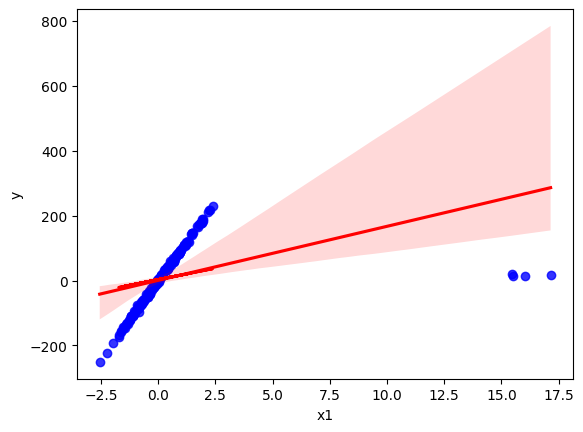

In [89]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(x_train, y_train)

y_pred = elastic.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 91.77576744575744


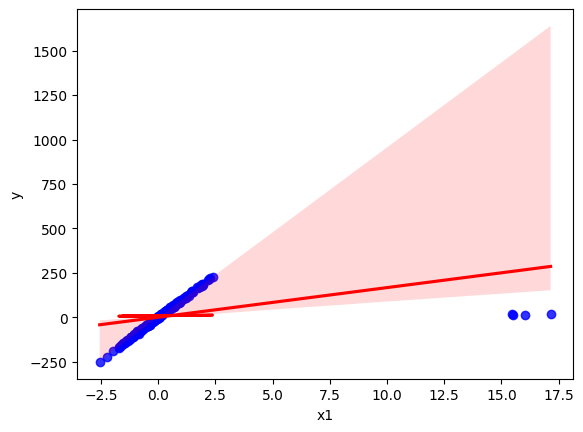

In [90]:
ridge = Ridge(alpha=10000)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.show()

RMSE: 93.27267976131172


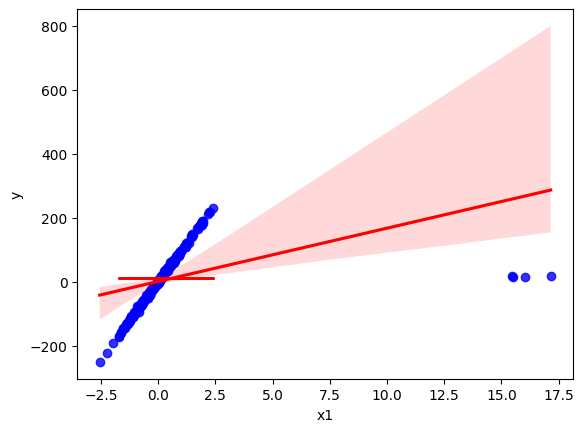

In [91]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso = Lasso(alpha=1000)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

plt.plot(x_test, y_pred, color='red', linewidth=2)
sns.regplot(x='x1', y='y', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.show()

RMSE: 4.313048870850949
[93.78333746]
-0.14652164868524653


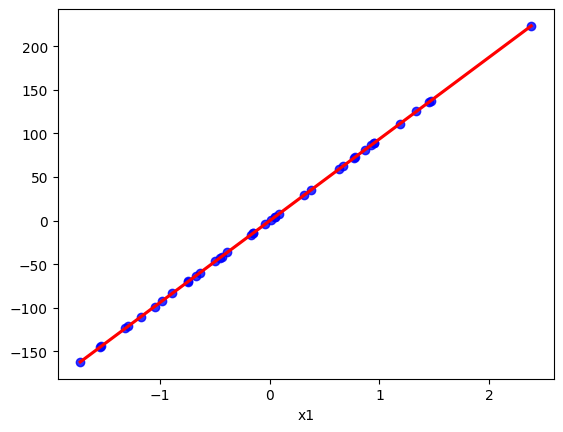

In [92]:
X = df[['x1']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

huber = HuberRegressor(epsilon=1.35)
huber.fit(x_train, y_train)

y_pred = huber.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print(huber.coef_)
print(huber.intercept_)

# plt.plot(x_test, y_pred, color='red', linewidth=2)

# sns.regplot(x='x1', y='y', data=df,
#             scatter_kws={'color': 'blue'},
#             # line_kws={'color': 'red'}
#             )
sns.regplot(x=x_test, y=y_pred, color='red', scatter_kws={'color': 'blue'})

plt.show()

RMSE: 3.8556068941605295
[96.19953348]
-0.08700975367706719


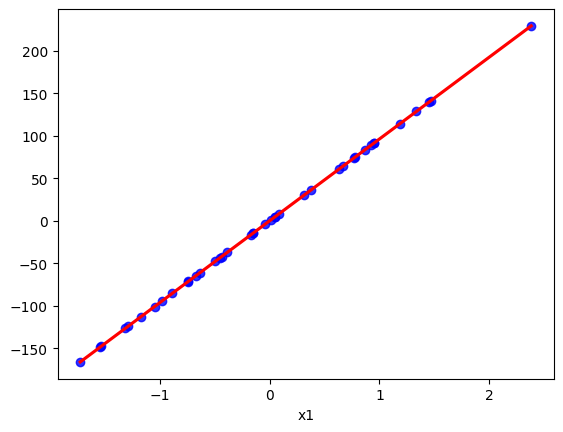

In [93]:
tail = TheilSenRegressor(random_state=42)
tail.fit(x_train, y_train)

y_pred = tail.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print(tail.coef_)
print(tail.intercept_)

sns.regplot(x=x_test, y=y_pred, color='red', scatter_kws={'color': 'blue'})

plt.show()

In [94]:
X = df[['x1']]
y = df['y']


linear_model = LinearRegression()
linear_model.fit(X, y)

tail = TheilSenRegressor()
tail.fit(X, y)

huber = HuberRegressor()
huber.fit(X, y)

ransac = RANSACRegressor()
ransac.fit(X, y)


linear_rmse = np.sqrt(mean_squared_error(y, linear_model.predict(X)))
tail_rmse = np.sqrt(mean_squared_error(y, tail.predict(X)))
huber_rmse = np.sqrt(mean_squared_error(y, huber.predict(X)))
ransac_rmse = np.sqrt(mean_squared_error(y, ransac.predict(X)))

mae_linear = mean_absolute_error(y, linear_model.predict(X))
mae_tail = mean_absolute_error(y, tail.predict(X))
mae_huber = mean_absolute_error(y, huber.predict(X))
mae_ransac = mean_absolute_error(y, ransac.predict(X))


median_error = median_absolute_error(y, linear_model.predict(X))
median_error_tail = median_absolute_error(y, tail.predict(X))
median_error_huber = median_absolute_error(y, huber.predict(X))
median_error_ransac = median_absolute_error(y, ransac.predict(X))

print('Median Error Linear:', median_error)
print('Linear MAE:', mae_linear)
print('Linear RMSE:', linear_rmse)
print()
print('Median Error RANSAC:', median_error_ransac)
print('RANSAC MAE:', mae_ransac)
print('RANSAC RMSE:', ransac_rmse)
print()
print('Median Error Tail:', median_error_tail)
print('Theil MAE:', mae_tail)
print('Theil RMSE:', tail_rmse)
print()
print('Median Error Huber:', median_error_huber)
print('Huber MAE:', mae_huber)
print('Huber RMSE:', huber_rmse)

Median Error Linear: 61.111986806932016
Linear MAE: 70.47684795490645
Linear RMSE: 87.84258324232447

Median Error RANSAC: 2.80313699184025
RANSAC MAE: 33.6413185524335
RANSAC RMSE: 216.27574085234014

Median Error Tail: 2.8990416493931725
Theil MAE: 33.59658822603839
Theil RMSE: 215.7746378529271

Median Error Huber: 3.1276796124134734
Huber MAE: 33.37545948380207
Huber RMSE: 211.5793715520509


In [95]:
data = pd.read_csv('data_feature_selection.csv')
data.head()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,y
0,0,-1.572796,-0.332759,-0.392821,-1.259596,0.826126,1.226664,-0.217163,-1.448793,-0.652853,...,-0.057281,0.561450,-0.838311,2.337410,-0.204008,0.666355,1.523771,0.095412,-0.336274,32.488872
1,1,0.079122,-1.040599,-1.133593,1.238007,-1.011774,0.850531,-1.373054,-0.032850,-0.422113,...,0.096004,-0.010056,0.757468,-0.643258,-0.315603,-0.839124,-0.148766,1.587762,0.996760,24.748279
2,2,0.037996,0.650042,1.336386,-0.843616,0.766990,1.714051,0.003583,0.099201,0.682386,...,-0.046481,-0.050083,1.483129,-0.496608,-0.364170,-0.767949,0.461469,-0.268010,-0.120041,47.960983
3,3,0.232181,0.426259,-0.463596,-2.069985,-1.424061,-0.597316,0.416050,0.251589,-0.945513,...,0.063262,1.494485,0.781198,-0.345982,0.676908,-0.237922,-1.540797,-0.955945,0.481481,-167.823931
4,4,0.852830,0.938585,-0.013451,1.239941,-0.726366,0.669562,-0.608815,0.861405,0.362566,...,0.480970,1.951761,1.925806,-0.374126,-1.019251,1.004419,0.410602,0.152177,0.815472,14.316381


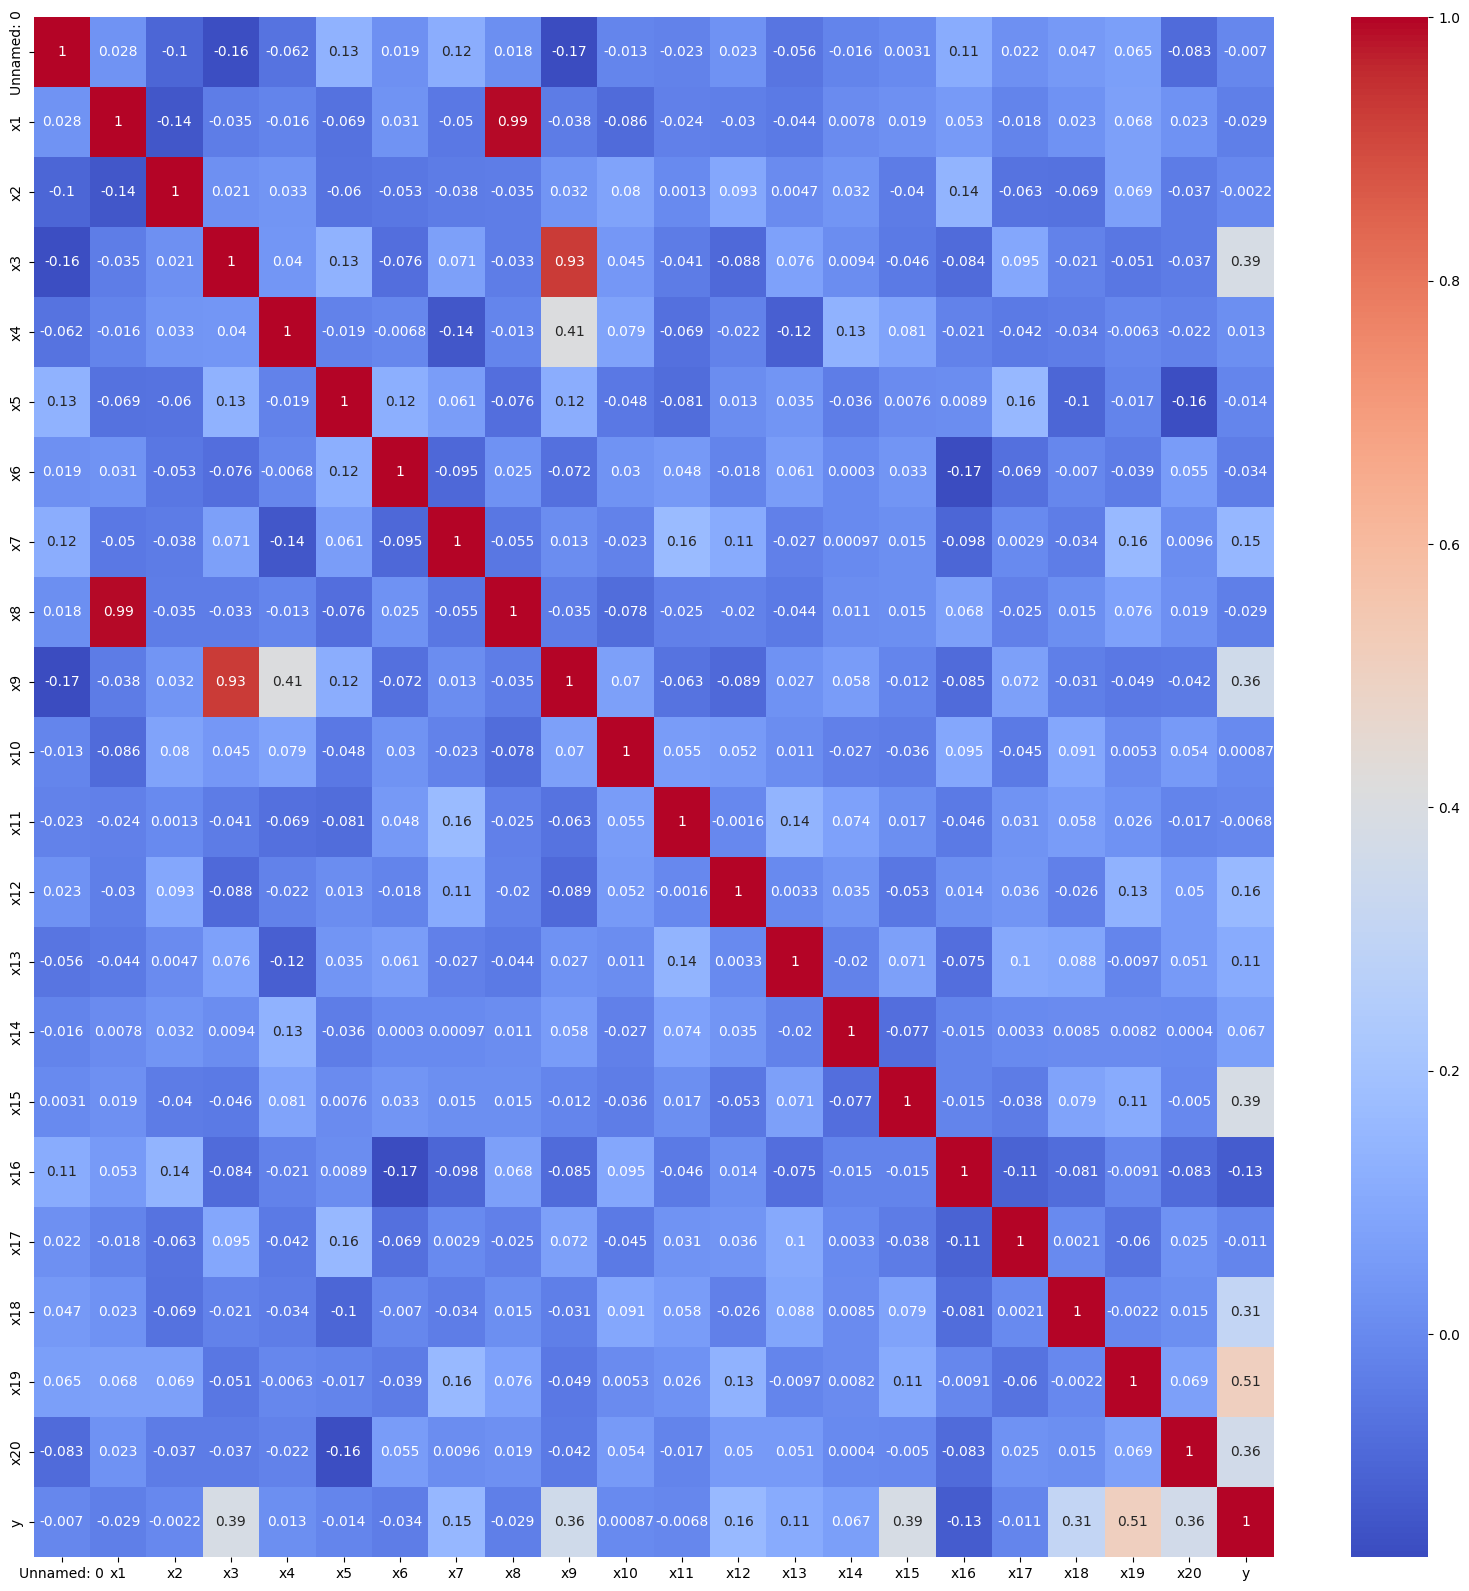

In [103]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
plt.show()

In [114]:
X = df.drop('y', axis=1)
y = df['y']

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
cros_rmse = np.sqrt(np.mean(-cross_val_score(linear_model, X , y, scoring='neg_mean_squared_error', cv=6)))

linear_model.fit(X, y)

y_pred = linear_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)
print('CV RMSE', cros_rmse)
print(linear_model.coef_)
print(linear_model.intercept_)

RMSE: 76.3298515265894
CV RMSE 227.4718385106401
[16.65932962]
0.5304539895232265


In [126]:
# Define features and target
X = data.drop('y', axis=1)
y = data['y']

cv = KFold(n_splits=6, shuffle=True, random_state=42)

linear_model = LinearRegression()

rfecv = RFECV(estimator=linear_model, step=1, cv=cv, scoring='neg_mean_squared_error', verbose=2)

rfecv.fit(X, y)
optimal_num_features = rfecv.n_features_
selected_features = X.columns[rfecv.support_]

print("Optimal number of features:", optimal_num_features)
print("Selected features:", selected_features.tolist())

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


In [127]:
optimal_num_features

11

In [129]:
data[selected_features]

,x1,x3,x4,x8,x9,x12,x14,x15,x18,x19,x20
0,-1.572796,-0.392821,-1.259596,-1.448793,-0.652853,-0.057281,-0.838311,2.337410,1.523771,0.095412,-0.336274
1,0.079122,-1.133593,1.238007,-0.032850,-0.422113,0.096004,0.757468,-0.643258,-0.148766,1.587762,0.996760
2,0.037996,1.336386,-0.843616,0.099201,0.682386,-0.046481,1.483129,-0.496608,0.461469,-0.268010,-0.120041
3,0.232181,-0.463596,-2.069985,0.251589,-0.945513,0.063262,0.781198,-0.345982,-1.540797,-0.955945,0.481481
4,0.852830,-0.013451,1.239941,0.861405,0.362566,0.480970,1.925806,-0.374126,0.410602,0.152177,0.815472
...,...,...,...,...,...,...,...,...,...,...,...
195,0.564211,-0.388643,0.708520,0.493925,-0.059494,-1.551441,2.078230,0.101061,-0.179082,0.526782,-0.646792
196,-1.818078,-0.422315,-1.678688,-1.614773,-0.799227,0.201480,-0.907300,0.892474,0.228053,0.555963,0.104714
197,0.724369,-0.361599,0.094192,0.537171,-0.224862,0.433108,0.412871,-0.144567,-0.937880,0.359504,1.064585
198,0.553132,-0.908763,-0.514234,0.396015,-0.790404,-2.655619,-0.073925,1.029439,0.862596,0.771406,-0.424318
